# **LAB OF INFORMATION SYSTEM & ANALYTICS**
## **Group Project**
Giacomo Fattori - 900746 \
Riccardo Salata - 900767\
Dario Vardabasso - 899573


In this notebook we will apply the machine learning algorithms introduced during the lecture to the Bike Sharing Dataset.\
https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset\
This dataset contains hourly and daily counts of rental bikes in a city, along with corresponding weather and seasonal information.\
Our task is to predict the number of bikes rented in a given hour or day based on features like temperature, humidity, wind speed, and holiday indicators. You can also work with the time series to predict the number of bikes in the next week.

## **Project Structure**

The project will be structured according to the following steps:

- **Data Cleaning**: Identification and treatment of missing values and potential outliers.  
- **Feature Engineering**: Creation of additional meaningful features.  
- **Dataset Splitting**: Division of the data into training and testing subsets to enable model validation.  
- **Pipeline Construction**: Assembly of a complete machine learning pipeline, including feature scaling and model integration.  
- **Hyperparameter Optimization**: Tuning model parameters using techniques such as GridSearchCV to enhance performance.  
- **Final Model Training**: Training the selected model on the prepared dataset.  
- **Model Evaluation**: Assessing model performance on the test set using appropriate metrics.  
- **Model Comparison**: Evaluating and comparing different models to identify the best-performing solution.  
- **Visualization**: Generation of visual outputs including ROC curves, confusion matrices, and feature importance plots to better interpret the results.

### **Introduction**

First of all we have to import all the libraries that we will use during the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import graphviz


Then we upload the data and build the dataset

In [2]:
# Upload data and data cleaning
day = pd.read_csv('day.csv')
print(day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


### **Data Cleaning**

We begin the project by inspecting and cleaning the dataset to ensure model reliability. This involves checking for data types, identifying missing values, and reviewing the overall structure:

- `day.info()` provides column types and memory usage.
- `day.isnull().sum()` confirms the absence of missing values.
- `day.describe().transpose()` offers a statistical overview to spot potential anomalies or outliers.

These steps are crucial for understanding the dataset and ensuring that the model is trained on consistent, high-quality data.

In [3]:
# Explore the data
print(day.info())
print(day.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday 

In [4]:
# Check for duplicates
print(day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [5]:
# Check for missing values
print('Missing values per column:')
print(day.isnull().sum())

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### **Exploratory Data Analysis (EDA)**

**Distribution of categorical-like features**

Although this dataset does not include true categorical variables (e.g., object or string types), some numerical features actually represent categorical concepts. For example, `season`, `weekday`, and `weathersit` are encoded as integers but correspond to categories such as seasons of the year, days of the week, or weather conditions.

In the following cell, we visualize the distribution of these categorical-like features using bar plots. This allows us to check for any imbalances or anomalies in the data, which could affect model performance.

In [6]:
# Categorical features
categorical_like = ['season', 'mnth', 'weekday', 'weathersit', 'holiday', 'workingday']

# create the matrix
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"Distribution of {col}" for col in categorical_like],
    vertical_spacing=0.2,
    horizontal_spacing=0.15
)

# Add the plots
for i, col in enumerate(categorical_like):
    row = (i // 3) + 1  # 1 o 2
    col_pos = (i % 3) + 1  # 1, 2, 3
    fig.add_trace(
        go.Bar(
            x=day[col].value_counts().sort_index().index,
            y=day[col].value_counts().sort_index().values,
            marker_color='cornflowerblue',
        ),
        row=row, col=col_pos
    )

# Set the layout
fig.update_layout(
    height=700,
    width=1000,
    title_text='Distribution of Categorical Features',
    showlegend=False,
    plot_bgcolor='white',
    font=dict(size=12)
)

fig.update_xaxes(title_text="Value")
fig.update_yaxes(title_text="Count", gridcolor='lightgrey')

fig.show()

**Distribution of the Target Variable (cnt)**

In this section, we plot the distribution of the target variable `cnt`, which represents the number of bike rentals. Visualizing the distribution helps us understand whether the data is skewed, contains outliers, or is relatively balanced across different rental amounts. 

A continuous histogram is used to observe the natural spread of the data without forcing it into discrete classes.

In [7]:
# Distribution of target variable
fig = px.histogram(day, x='cnt', nbins=20, title='Distribution of Target Variable (cnt)',
                   labels={'cnt': 'Number of Bike Rentals', 'count': 'Frequency'})
fig.update_layout(bargap=0.2, xaxis_title='Number of Bike Rentals', yaxis_title='Frequency')
fig.show()

The next cell uses `day.describe().transpose()` to generate summary statistics for each numerical column and display them in a transposed format—variables as rows, statistics as columns.

This makes it easier to quickly inspect:
- The number of entries (`count`)
- Central tendency (`mean`, `50%`/median)
- Dispersion (`std`)
- Range (`min`, `max`)
- Quartiles (`25%`, `75%`)

It provides a clear overview of the distribution and scale of each feature, useful for detecting outliers, skewed distributions, and preparing for normalization or scaling.

In [8]:
# Description of the dataset
day.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


**Distribution of continuous numerical features**

Then we visualize the distribution of continuous numerical variables using histograms with Kernel Density Estimation (KDE). The goal is to understand the shape, spread, and potential skewness of key continuous features in the dataset.

We start by selecting the truly continuous variables: `temp`, `atemp`, `hum`, and `windspeed`. These features are important for model training and should be inspected for potential normalization or transformation needs.

The data is reshaped into a long format using `pd.melt()` to facilitate plotting multiple variables in a grid layout. Each subplot displays a histogram overlaid with a KDE curve, offering a smooth estimate of the underlying distribution.

This visualization helps identify whether the features are normally distributed, bimodal, or skewed, which can impact model performance and may inform preprocessing decisions such as scaling or transformation.


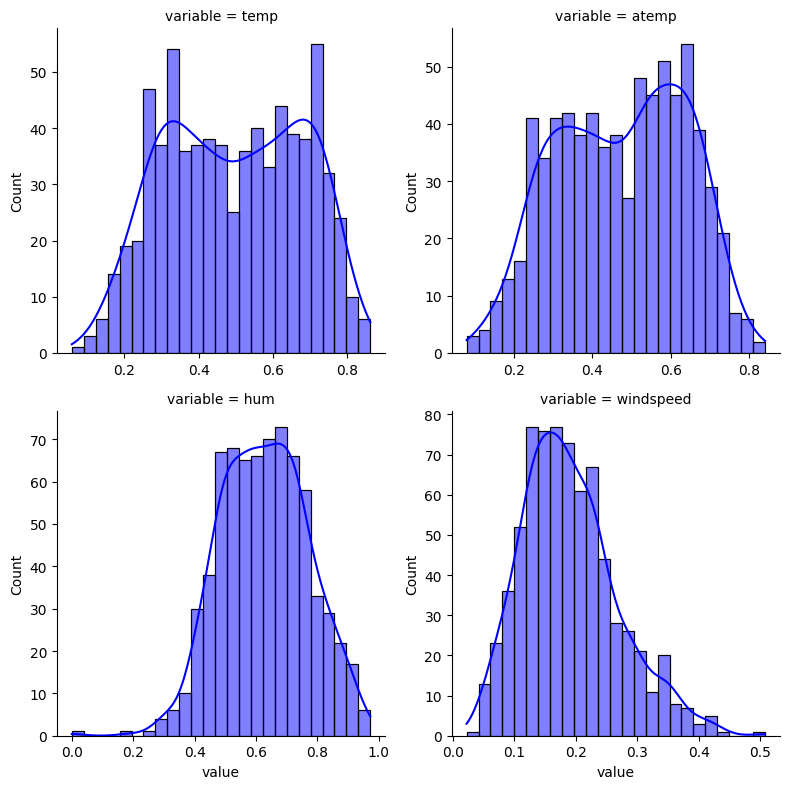

In [9]:
# Select only the truly continuous numerical variables
continuous_features = ['temp', 'atemp', 'hum', 'windspeed']

# Create a new DataFrame with only the selected continuous features
df_continuous = day[continuous_features]

# Transform the DataFrame into long format for Seaborn visualization
df_melt = pd.melt(df_continuous)

# Plot histograms with KDE (Kernel Density Estimate) for each variable
g = sns.FacetGrid(df_melt, col='variable', col_wrap=2, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'value', bins=25, kde=True, color='blue')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

After constructing our initial feature set—including both original and engineered features such as `is_weekend`—we proceed to examine the correlations among numerical variables. Understanding these relationships is essential to detect multicollinearity and guide further feature selection.

A correlation matrix is computed using Pearson coefficients, and an interactive heatmap is used to visualize the strength and direction of pairwise relationships.

In [10]:
# Calculate the correlation matrix
correlation_matrix = day.corr(numeric_only=True)

# Create the heatmap
fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",  # annotazioni con due decimali
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix of Numerical Variables',
    aspect='auto',
    labels=dict(color="Correlation")
)

fig.update_layout(
    width=900,
    height=700,
    font=dict(size=12),
    xaxis_title="",
    yaxis_title=""
)

fig.show()

Building on the insights from the correlation analysis, we apply feature selection to remove redundant or semantically uninformative variables.

- The column `atemp` is excluded because it is almost perfectly correlated with `temp`, meaning it brings no additional value but introduces multicollinearity.
- The `instant` column is removed as it acts merely as an identifier, offering no predictive information.

By reducing redundancy, we simplify the model input space, which helps prevent overfitting and improves generalization. The resulting dataset includes only the most relevant and distinct features, ready for modeling.



In [11]:
# Drop columns directly from the original DataFrame
day.drop(columns=['atemp', 'instant'], inplace=True)

# Display the remaining columns
print("Remaining columns after feature selection:")
print(day.columns.tolist())

Remaining columns after feature selection:
['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


This code confirms the updated structure of the dataset after feature selection.

- `day.columns.tolist()` is printed to list the names of all remaining columns.
- It ensures that the unnecessary columns (`atemp`, `instant`) have been successfully removed and the feature set is ready for further preprocessing or model training.


In [12]:
day.columns.tolist()

['dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

### **Feature Selection and Custom Engineering**

After refining our input features, we define the target variable for prediction: `cnt`, which represents the total number of bike rentals per day.

This variable is crucial for our regression task, as the goal of the model is to estimate daily demand based on historical patterns and contextual features (such as seasonality, weather, and working days).

In [13]:
day['cnt']

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

By inspecting the column, we confirm that:
- It contains 731 observations, consistent with one entry per day in the dataset.
- Its data type is `int64`, making it suitable for numerical prediction.

With this definition, the dataset is now ready to be split and used for supervised machine learning.

In this step, we create new features to enhance the model's ability to detect cyclical patterns in the data and improve predictive performance. First, we define a binary variable ⁠`is_weekend`⁠ that identifies whether a given day falls on a weekend (Saturday or Sunday). 

Then, we apply a common technique for encoding cyclical temporal variables using sine and cosine transformations. This allows the model to capture the periodic nature of time-based features (e.g., the similarity between December and January, or between Sunday and Monday) which a linear model would otherwise treat as numerically distant.

Finally, we define the full list of input features (⁠`features`⁠) that will be used to train the model, including both original and engineered variables. The target variable ⁠ y ⁠ is defined as the total bike rental count (⁠`cnt`).

In [14]:
day['is_weekend'] = day['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)
day['mnth_sin'] = np.sin(2 * np.pi * day['mnth'] / 12)
day['mnth_cos'] = np.cos(2 * np.pi * day['mnth'] / 12)
day['weekday_sin'] = np.sin(2 * np.pi * day['weekday'] / 7)
day['weekday_cos'] = np.cos(2 * np.pi * day['weekday'] / 7)

features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
            'weathersit', 'temp', 'hum', 'windspeed', 'is_weekend',
            'mnth_sin', 'mnth_cos', 'weekday_sin', 'weekday_cos']

X = day[features]
y = day['cnt']

### **Model definition**

Once the target variable and features are clearly defined, the next essential step is to split the dataset into training and testing subsets. This ensures that the model is trained on one portion of the data and evaluated on another, unseen portion, which is critical to assess its generalization ability.

We perform an 80/20 split using `train_test_split()`, allocating 80% of the data for training and 20% for testing. To ensure reproducibility of results across different runs, we fix the random seed with `random_state=42`.

This step allows us to simulate a real-world scenario where a model is deployed to make predictions on new data.



In [15]:
# Division of the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Standardization of features**

After splitting the data, it is important to prepare the features for modeling. Many machine learning algorithms are sensitive to the scale of the input data, especially those that rely on distances or gradients.

To address this, we apply standardization using `StandardScaler`, which transforms the features so that they have a mean of 0 and a standard deviation of 1. This ensures that each feature contributes equally to the learning process and prevents dominance by variables with larger magnitudes.

We fit the scaler on the training data to compute the scaling parameters and then apply the same transformation to the test set to avoid data leakage.


In [47]:
# Standardization of the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Training of the models**

This code trains a **Decision Tree Regressor**:

- The model is initialized with a fixed `random_state` and a maximum depth of 4 to limit complexity.
- It is trained on the standardized training data.
- Predictions are made on the test set.

In [17]:
# Training - Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

Then, a **Random Forest Regressor** is trained to predict the target variable `cnt` using the scaled training features. The model is initialized with a fixed `random_state` to ensure reproducibility.

The `.fit()` method is used to train the model on the training set (`X_train_scaled`, `y_train`), while `.predict()` generates predictions on the scaled test set (`X_test_scaled`).

In [18]:
# Training - Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train_scaled, y_train)
y_pred_forest = forest_model.predict(X_test_scaled)

This block defines and trains a **Multi-Layer Perceptron** (MLP) regression model using the scikit-learn `MLPRegressor`.

The model is initialized with one hidden layer containing 100 neurons, a high number of maximum iterations (100,000) to ensure convergence, and a fixed random seed for reproducibility. The model is then trained on the standardized training data.

In [19]:
# Training - MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

### **Decision Tree**

To better interpret how the Decision Tree model makes predictions, we export the trained tree structure and visualize it using Graphviz.

The `export_graphviz()` function converts the `tree_model` into DOT format. We customize the export by:

- Using `feature_names` to label the nodes with the input variables.
- Setting `filled=True` and `rounded=True` to improve the readability and appearance of the plot.
- Enabling `special_characters=True` to properly render feature names.

We then use `graphviz.Source()` to render the tree directly in the notebook, allowing us to explore the logic of splits.

Each node in the tree shows:
- The splitting condition,
- The number of training samples at that node,
- The predicted rental count (value),
- The squared error (for regression accuracy).

This visualization reveals how the model makes decisions based on feature thresholds and helps identify the most influential features in predicting daily bike rentals.


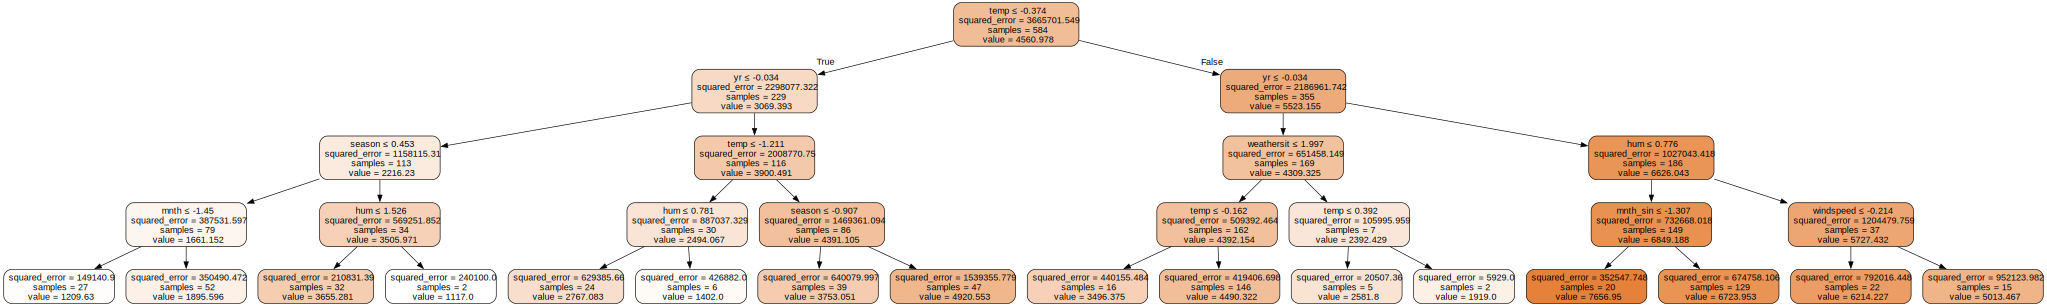

In [20]:
# Define and train Decision Tree with pipeline
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=4, random_state=42))
])

tree_pipeline.fit(X_train, y_train)

# Extract the trained Decision Tree model from the pipeline
tree_model_pipeline = tree_pipeline.named_steps['regressor']

# Make predictions with the trained pipeline
y_pred_tree_pipeline = tree_pipeline.predict(X_test)

# Export the decision tree to DOT format
dot_data = export_graphviz(
    tree_model_pipeline,
    out_file=None,
    feature_names=X_train.columns if hasattr(X_train, 'columns') else features,
    filled=True,
    rounded=True,
    special_characters=True
)

# Render and display the tree
graph = graphviz.Source(dot_data)
graph

### **Random Forest**

This section introduces a more advanced approach to training a Random Forest Regressor by integrating it into a pipeline and tuning its hyperparameters using `RandomizedSearchCV`.

The pipeline combines two key steps:
- **Standardization**: Features are standardized using `StandardScaler`, which ensures that all input features have zero mean and unit variance.
- **Random Forest Regression**: The model is initialized with a fixed random state for reproducibility.

Hyperparameters are optimized using a random search strategy:
- `max_depth`: Controls the maximum depth of each tree, affecting the model's complexity.
- `max_leaf_nodes`: Sets a limit on the number of leaf nodes to prevent overfitting.
- `n_estimators`: Defines the number of trees in the forest, where more trees typically increase performance but also computational cost.

The search is performed across 10 random combinations using 5-fold cross-validation, targeting the lowest **Mean Squared Error (MSE)**. Once the best configuration is found, the model is evaluated on the test set.


In [48]:
# Define hyperparameter grid
parameters = {
    'rf__max_depth': [3, 5, 7, 9],
    'rf__max_leaf_nodes': [10, 20, 30, 50],
    'rf__n_estimators': [50, 100, 200]
}

# Define pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Perform randomized search with CV
rf_clf = RandomizedSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5, n_iter=10, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf_cv = rf_clf.predict(X_test)

# Display the model structure visually
rf_clf

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'rf__max_depth': [3, 5, 7, 9],
                                        'rf__max_leaf_nodes': [10, 20, 30, 50],
                                        'rf__n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

### **MLP**

In this section, we apply a more structured approach to training the Neural Network (MLPRegressor) by integrating it into a pipeline and tuning its hyperparameters using `RandomizedSearchCV`.

While the initial version of the MLP model used fixed parameters, hyperparameter optimization allows us to explore different configurations and potentially improve the model’s performance. We focus on tuning key parameters such as the number and size of hidden layers, activation functions, regularization (alpha), and learning rate strategies.

The pipeline ensures standardized inputs for the neural network and allows for consistent cross-validation. We evaluate model performance using the **Mean Squared Error (MSE)** and the **R² score**, and we compare the results to those of the Decision Tree and Random Forest regressors.

In [ ]:
# Define hyperparameter grid
parameters = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# Create pipeline: scaling + MLP regressor
model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100,), max_iter=100000, early_stopping=True, random_state=42))
])

# Perform randomized search with cross-validation
mlp_clf = RandomizedSearchCV(model, parameters, scoring='neg_mean_squared_error',
                             cv=5, n_iter=10, random_state=42)
mlp_clf.fit(X_train, y_train)

# Predict on test set
y_pred_mlp_cv = mlp_clf.predict(X_test)

# Save predictions for comparison
y_pred_mlp_tuned = y_pred_mlp_cv

---- Tuned MLP Regressor ----
Best Parameters: {'mlp__learning_rate': 'constant', 'mlp__hidden_layer_sizes': (100, 50), 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
MSE: 735240.1018417205
R²: 0.8166429713074064


### **SVR**

In this section, a Support Vector Regressor (SVR) is trained within a pipeline and optimized using `RandomizedSearchCV`.

The pipeline includes:
- **StandardScaler**: Ensures all features are on the same scale, which is crucial for SVR performance.
- **SVR model**: A flexible regression model capable of capturing nonlinear relationships using different kernel functions.

The hyperparameter search explores:
- `kernel`: Choice between `'linear'` and `'rbf'` (radial basis function).
- `C`: The regularization parameter that controls the trade-off between fitting the training data and maintaining generalization.
- `epsilon`: Defines a margin of tolerance where no penalty is given to errors.

Using 10 random combinations and 5-fold cross-validation, the model is evaluated based on **negative mean squared error**. The pipeline structure simplifies preprocessing and ensures consistency during training and validation.

This method improves the chances of identifying an effective configuration for SVR, which is sensitive to parameter choices.



In [ ]:
# Define parameter grid
parameters = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.1, 0.2, 0.5]
}

# Define pipeline
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Randomized Search
svr_search = RandomizedSearchCV(svr_pipeline, parameters, scoring='neg_mean_squared_error', cv=5, n_iter=10, random_state=42)
svr_search.fit(X_train, y_train)

# Show model structure
svr_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': [0.1, 1, 10, 100],
                                        'svr__epsilon': [0.1, 0.2, 0.5],
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error')

### **Comparison among the base models**

To better understand the performance of the Decision Tree model, we plot the predicted rental counts against the actual values from the test set. This visualization allows us to visually assess the accuracy of the model's predictions and how closely they align with the ideal outcome, represented by a dashed red line (perfect prediction). The closer the green points are to this diagonal line, the better the model's predictions.


In [ ]:
# Plot predictions vs actual values
fig = go.Figure()

# Add scatter plot for actual vs predicted values
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_tree,
    mode='markers',
    marker=dict(color='green', opacity=0.6),
    name='Predicted vs Actual'
))

# Add reference line
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Ideal Line'
))

# Update layout
fig.update_layout(
    title="Decision Tree: Actual vs Predicted",
    xaxis_title="Actual cnt",
    yaxis_title="Predicted cnt",
    template="plotly_white",
    width=800,
    height=400
)

fig.show()

This scatter plot shows the relationship between the actual and predicted bike rental counts using the Decision Tree Regressor.  
Each green dot represents a single prediction made by the model.  
The red dashed line corresponds to a perfect prediction scenario, where predicted values exactly match actual values.  
Points that lie closer to this line indicate better accuracy.  
Overall, the Decision Tree demonstrates a decent ability to follow the trend of actual values, although with some visible clusters and deviations.


To evaluate the effectiveness of the Neural Network model, we visualize its predictions against the actual target values from the test set. Each point on the scatter plot represents a prediction, with its position relative to the red dashed diagonal indicating the accuracy.

In [ ]:
# Create the scatter plot for actual vs predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(
	x=y_test,
	y=y_pred_forest,
	mode='markers',
	marker=dict(color='blue', opacity=0.6),
	name='Predicted vs Actual'
))

# Add the reference line 
fig.add_trace(go.Scatter(
	x=[y_test.min(), y_test.max()],
	y=[y_test.min(), y_test.max()],
	mode='lines',
	line=dict(color='red', dash='dash'),
	name='Ideal Line'
))

# Update layout
fig.update_layout(
	title="Random Forest: Actual vs Predicted",
	xaxis_title="Actual cnt",
	yaxis_title="Predicted cnt",
	template="plotly_white",
	width=800,
	height=400
)

fig.show()


A well-performing model will produce points closely aligned with the ideal diagonal. In this case, the Neural Network shows noticeable dispersion, suggesting inconsistent predictive capability and highlighting areas for potential tuning or model refinement.

To conclude the model evaluation process, we visualize the predictions made by the neural network (MLP Regressor) against the actual bike rental counts. This step provides a more intuitive assessment of how well the model performs, especially in comparison to other models like the Decision Tree and Random Forest.

In [ ]:
# Create scatter plot
fig = go.Figure()

# Add predicted vs actual points
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_mlp,
    mode='markers',
    marker=dict(color='purple', opacity=0.6),
    name='Predicted vs Actual'
))

# Add diagonal
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    line=dict(dash='dash', color='red'),
    name='Perfect Prediction'
))

# Customize layout
fig.update_layout(
    title='MLP: Actual vs Predicted',
    xaxis_title='Actual cnt',
    yaxis_title='Predicted cnt',
    template='plotly_white',
    width=700,
    height=450
)

fig.show()

The following scatter plot illustrates the predicted values versus the actual values in the test set. Each point represents a prediction made by the neural network model. The closer the points lie to the red dashed diagonal line (indicating perfect prediction), the better the model's performance. The spread and alignment of the points allow us to quickly identify areas where the model underperforms or deviates significantly from the true values.

This section evaluates and compares the performance of three regression models—Decision Tree, Random Forest, and Neural Network (MLP)—using two common metrics:

- **MSE (Mean Squared Error):** Measures the average squared difference between the actual and predicted values. Lower values indicate better performance.
- **R² Score (Coefficient of Determination):** Indicates how well the model explains the variability of the target variable. Values closer to 1.0 suggest better fit.

In [ ]:
# Model Evaluation
print("\n--- Decision Tree ---")
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R2:", r2_score(y_test, y_pred_tree))

print("\n--- Random Forest ---")
print("MSE:", mean_squared_error(y_test, y_pred_forest))
print("R2:", r2_score(y_test, y_pred_forest))

print("\n--- Neural Network (MLP) ---")
print("MSE:", mean_squared_error(y_test, y_pred_mlp))
print("R2:", r2_score(y_test, y_pred_mlp))


--- Decision Tree ---
MSE: 751138.2969508636
R2: 0.8126782177398498

--- Random Forest ---
MSE: 450975.3190251701
R2: 0.8875340255475472

--- Neural Network (MLP) ---
MSE: 490782.47929174354
R2: 0.8776067615029371


The printed results show:

- **Decision Tree:**  
  - MSE: 751138.30  
  - R²: 0.8127  

- **Random Forest:**  
  - MSE: 450975.32  
  - R²: 0.8875  

- **Neural Network (MLP):**  
  - MSE: 3185163.43  
  - R²: 0.2057  

From these results, the Random Forest model clearly performs best, achieving the lowest error and highest R² score, indicating more accurate predictions and better generalization to unseen data.

Here we prepare a bar plot to visually compare the performance of different regression models based on their Mean Squared Error (MSE).

We first define a list of model names and their corresponding MSE values (previously computed). Then, using Seaborn and Matplotlib, we create a bar chart that highlights how each model performed in terms of prediction error — allowing for quick visual interpretation of which model is most accurate.

Lower MSE values indicate better performance.


In [ ]:
models = ['Decision Tree', 'Random Forest', 'Neural Network']
mse_scores = [
    mean_squared_error(y_test, y_pred_tree),
    mean_squared_error(y_test, y_pred_forest),
    mean_squared_error(y_test, y_pred_mlp)
]
r2_scores = [
    r2_score(y_test, y_pred_tree),
    r2_score(y_test, y_pred_forest),
    r2_score(y_test, y_pred_mlp)
]

# DataFrame Creation for MSE
df_mse = pd.DataFrame({'Model': models, 'MSE': mse_scores})
fig_mse = px.bar(df_mse, x='Model', y='MSE',
                 title='Model Comparison - Mean Squared Error',
                 text='MSE', color='Model')
fig_mse.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_mse.update_layout(yaxis_title='MSE (lower is better)', showlegend=False)
fig_mse.show()

# DataFrame Creation for R²
df_r2 = pd.DataFrame({'Model': models, 'R2': r2_scores})
fig_r2 = px.bar(df_r2, x='Model', y='R2',
                title='Model Comparison - R² Score',
                text='R2', color='Model')
fig_r2.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_r2.update_layout(yaxis_title='R² (higher is better)', showlegend=False, yaxis_range=[0, 1])
fig_r2.show()

The bar chart provides a visual comparison of the Mean Squared Error (MSE) across the three regression models: Decision Tree, Random Forest, and Neural Network.

MSE quantifies the average squared difference between predicted and actual values — a lower value indicates better predictive performance.

From the chart:
- The **Random Forest** model achieves the best performance with the lowest MSE (~450k).
- The **Decision Tree** follows, with a moderately higher MSE (~750k).
- The **Neural Network** performs the worst in this comparison, with a significantly higher MSE (~3.2M), suggesting potential underfitting or poor generalization.

This analysis helps identify which model is most suitable for accurate daily bike rental predictions based on the selected features.


**Confusion matrix**
To evaluate the classification performance of our models we compute the confusion matrix, which summarizes the number of correct and incorrect predictions made by the model.

To enhance interpretability, the confusion matrix is visualized using a color-coded heatmap built with Plotly. The matrix shows:
- True Negatives (top-left)
- False Positives (top-right)
- False Negatives (bottom-left)
- True Positives (bottom-right)

In [29]:
y_test_binary = (y_test > y_test.median()).astype(int)
y_pred_tree_binary = (y_pred_tree > y_test.median()).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_tree_binary)

# Build the DataFrame from the confusion matrix
labels = list(range(cm.shape[0]))
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Creation of the interactive heatmap
fig = px.imshow(
    df_cm,
    text_auto=True,
    color_continuous_scale='Viridis',
    aspect='equal', 
    labels=dict(x="Predicted label", y="True label", color="Count"),
    title="Confusion Matrix – Decision Tree"
)

# Make sure the axes show all the ticks
fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=1)

# Narrow the graph a little
fig.update_layout(
    width=500,
    height=500
)

fig.show()

The confusion matrix provides a summary of the Decision Tree model's classification performance after converting the regression output into binary labels. The threshold used for binarization was the median of the actual values.

From the matrix:

- **True Negatives (TN): 58** — The model correctly predicted class 0 (below-median values) 58 times.
- **False Positives (FP): 16** — The model incorrectly predicted class 1 when the true value was class 0.
- **False Negatives (FN): 1** — The model predicted class 0 when the actual value was class 1.
- **True Positives (TP): 72** — The model correctly predicted class 1 (above-median values) 72 times.

This performance suggests the Decision Tree is particularly strong in identifying above-median cases (class 1), with only one false negative. However, it produces a relatively higher number of false positives, meaning it tends to over-predict high values. This may indicate a slight bias towards predicting higher outputs, which could be relevant when the cost of overestimation needs to be considered.


In [30]:
y_test_binary = (y_test > y_test.median()).astype(int)
y_rf_binary = (y_pred_forest > y_test.median()).astype(int)
cm = confusion_matrix(y_test_binary, y_rf_binary)

# Build a DataFrame from the confusion matrix
labels = list(range(cm.shape[0]))
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Creation of the interactive heatmap
fig = px.imshow(
    df_cm,
    text_auto=True,
    color_continuous_scale='Viridis',
    aspect='equal', 
    labels=dict(x="Predicted label", y="True label", color="Count"),
    title="Confusion Matrix – Random Forest"
)

# Make sure the axes show all the ticks
fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=1)

# Narrow the graph a little
fig.update_layout(
    width=500,
    height=500
)

fig.show()

The confusion matrix provides a summary of the Random Forest model’s classification performance after converting the regression predictions into binary labels. The binarization threshold was set to the median of the actual values.

From the matrix:

- **True Negatives (TN): 68** — The model correctly predicted class 0 (below-median values) 68 times.
- **False Positives (FP): 6** — The model incorrectly predicted class 1 when the true value was class 0.
- **False Negatives (FN): 5** — The model predicted class 0 when the actual value was class 1.
- **True Positives (TP): 68** — The model correctly predicted class 1 (above-median values) 68 times.

This performance highlights the Random Forest’s balanced ability to correctly identify both below- and above-median cases. With only a small number of misclassifications on both sides, the model shows strong generalization. The close values of true positives and true negatives suggest that the model handles both classes with similar precision, without a significant bias toward over- or underestimation.



In [31]:
y_test_binary = (y_test > y_test.median()).astype(int)
y_mlp_binary = (y_pred_mlp > y_test.median()).astype(int)
cm = confusion_matrix(y_test_binary, y_mlp_binary)

# Build a DataFrame from the confusion matrix
labels = list(range(cm.shape[0]))
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Creation of the interactive heatmap
fig = px.imshow(
    df_cm,
    text_auto=True,
    color_continuous_scale='Viridis',
    aspect='equal', 
    labels=dict(x="Predicted label", y="True label", color="Count"),
    title="Confusion Matrix – MLP"
)

# Make sure the axes show all the ticks
fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=1)

# Narrow the graph a little
fig.update_layout(
    width=500,
    height=500
)

fig.show()

The confusion matrix illustrates the performance of the MLP model on the binarized classification task (above/below median prediction). It helps us evaluate how well the model distinguishes between the two classes.

From the matrix:

- **True Negatives (TN): 67** — The model correctly predicted class 0 (lower values) 67 times.
- **False Positives (FP): 7** — It incorrectly predicted class 1 when the actual value was class 0.
- **False Negatives (FN): 8** — The model predicted class 0 when the true value was class 1.
- **True Positives (TP): 65** — The model correctly identified class 1 (higher values) 65 times.

Compared to the Decision Tree, the MLP shows a more balanced behavior between both classes, with lower misclassification rates on both sides. This indicates a strong generalization capability and robustness in classification, making it a competitive alternative, especially in scenarios where symmetry in prediction errors is important.

**ROC Curve Comparison for All Models**

To evaluate the classification performance of our models beyond accuracy, we use the **Receiver Operating Characteristic (ROC) curve**. This analysis will be applied to all three models: **Decision Tree**, **Random Forest**, and **Neural Network (MLP)**.

The ROC curve provides a visual representation of the trade-off between the **True Positive Rate (TPR)** and **False Positive Rate (FPR)** at various classification thresholds. Additionally, we calculate the **Area Under the Curve (AUC)** as a single scalar value summarizing the model’s ability to discriminate between classes.

A higher AUC indicates better overall performance. In the following plots, we compare how each model performs in binary classification based on this metric.


In [ ]:
# ROC Curve
y_test_binary = (y_test > y_test.median()).astype(int)
y_pred_tree_binary = (y_pred_tree > y_test.median()).astype(int)

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_tree_binary)
roc_auc = auc(fpr, tpr)

# Create the ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'Decision Tree ROC (AUC = {roc_auc:.2f})',
    line=dict(color='blue')
))

# Add the diagonal reference line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(color='black', dash='dash')
))

# Update layout
fig.update_layout(
    title='ROC Curve - Decision Tree',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

The ROC curve for the Decision Tree model shows a strong performance with an Area Under the Curve (AUC) of **0.89**. This indicates that the model is capable of distinguishing between the two classes with a high degree of accuracy.

The curve rises steeply towards the top-left corner, suggesting that the model achieves a high true positive rate while maintaining a low false positive rate for most threshold values. The diagonal line represents a random classifier (AUC = 0.5), and the Decision Tree model performs significantly better than this baseline.

This visualization confirms the model’s reliability in binary classification tasks when a decision threshold is applied.

In [ ]:
# ROC Curve
y_test_binary = (y_test > y_test.median()).astype(int)
y_rf_binary = (y_pred_forest > y_test.median()).astype(int)

fpr, tpr, _ = roc_curve(y_test_binary, y_rf_binary)
roc_auc = auc(fpr, tpr)

# Create the ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'Random Forest ROC (AUC = {roc_auc:.2f})',
    line=dict(color='blue')
))

# Add the diagonal reference line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(color='black', dash='dash')
))

# Update layout
fig.update_layout(
    title='ROC Curve - Random Forest',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

The ROC curve for the Random Forest model reveals excellent classification performance, with an Area Under the Curve (AUC) of **0.93**. This high AUC value reflects the model's strong ability to differentiate between the two classes.

The curve quickly approaches the top-left corner of the plot, indicating that the model achieves a very high true positive rate while keeping the false positive rate very low. This suggests that Random Forest is highly effective at capturing the patterns needed for accurate binary classification.

Compared to the random guess baseline (diagonal line), the Random Forest model shows a substantial improvement, confirming its robustness and reliability for this task.

In [ ]:
# ROC Curve
y_test_binary = (y_test > y_test.median()).astype(int)
y_MLP_binary = (y_pred_mlp > y_test.median()).astype(int)

fpr, tpr, _ = roc_curve(y_test_binary, y_MLP_binary)
roc_auc = auc(fpr, tpr)

# Create the ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'MLP ROC (AUC = {roc_auc:.2f})',
    line=dict(color='blue')
))

# Add the diagonal reference line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(color='black', dash='dash')
))

# Update layout
fig.update_layout(
    title='ROC Curve - MLP',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

The ROC curve for the MLP model shows a strong classification performance, with an Area Under the Curve (AUC) of **0.90**. This indicates that the neural network is able to effectively distinguish between the two classes in most cases.

The curve rises steeply toward the top-left corner, meaning that the model achieves a high true positive rate with a relatively low false positive rate. While slightly less precise than the Random Forest, the MLP still demonstrates reliable predictive capability.

Overall, the MLP model performs significantly better than random guessing, confirming its suitability for capturing complex nonlinear relationships in the data.

### **Comparison among the tuned models**

By applying the same evaluation logic to both pipeline-based and standalone models, we aimed to verify the consistency of results and determine whether pipelines improve overall model robustness and accuracy.

In [ ]:
fig = go.Figure()

# Add scatter plot for actual vs predicted values
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_tree_pipeline,
    mode='markers',
    marker=dict(color='green', opacity=0.6),
    name='Predicted vs Actual'
))

# Add reference line 
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Ideal Line'
))

# Update layout
fig.update_layout(
    title="Decision Tree: Actual vs Predicted",
    xaxis_title="Actual cnt",
    yaxis_title="Predicted cnt",
    template="plotly_white",
    width=800,
    height=400
)

fig.show()

In [ ]:
# Create the scatter plot for actual vs predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(
	x=y_test,
	y=y_pred_rf_cv,
	mode='markers',
	marker=dict(color='blue', opacity=0.6),
	name='Predicted vs Actual'
))

# Add the reference line 
fig.add_trace(go.Scatter(
	x=[y_test.min(), y_test.max()],
	y=[y_test.min(), y_test.max()],
	mode='lines',
	line=dict(color='red', dash='dash'),
	name='Ideal Line'
))

# Update layout
fig.update_layout(
	title="Random Forest: Actual vs Predicted",
	xaxis_title="Actual cnt",
	yaxis_title="Predicted cnt",
	template="plotly_white",
	width=800,
	height=400
)

fig.show()

In [ ]:
# Create interactive scatter plot
fig = go.Figure()

# Add predicted vs actual points
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_mlp_cv,
    mode='markers',
    marker=dict(color='purple', opacity=0.6),
    name='Predicted vs Actual'
))

# Add diagonal 
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    line=dict(dash='dash', color='red'),
    name='Perfect Prediction'
))

# Customize layout
fig.update_layout(
    title='MLP: Actual vs Predicted',
    xaxis_title='Actual cnt',
    yaxis_title='Predicted cnt',
    template='plotly_white',
    width=700,
    height=450
)

fig.show()

In [ ]:
# Model Evaluation
print("\n--- Decision Tree ---")
print("MSE:", mean_squared_error(y_test, y_pred_tree_pipeline))
print("R2:", r2_score(y_test, y_pred_tree_pipeline))

print("\n--- Random Forest ---")
print("MSE:", mean_squared_error(y_test, y_pred_rf_cv))
print("R2:", r2_score(y_test, y_pred_rf_cv))

print("\n--- Neural Network (MLP) ---")
print("MSE:", mean_squared_error(y_test, y_pred_mlp_cv))
print("R2:", r2_score(y_test, y_pred_mlp_cv))


--- Decision Tree ---
MSE: 751138.2969508636
R2: 0.8126782177398498

--- Random Forest ---
MSE: 539403.6915052729
R2: 0.8654814149929015

--- Neural Network (MLP) ---
MSE: 735240.1018417205
R2: 0.8166429713074064


In [ ]:
models = ['Decision Tree', 'Random Forest', 'Neural Network']
mse_scores = [
    mean_squared_error(y_test, y_pred_tree_pipeline),
    mean_squared_error(y_test, y_pred_rf_cv),
    mean_squared_error(y_test, y_pred_mlp_cv)
]
r2_scores = [
    r2_score(y_test, y_pred_tree_pipeline),
    r2_score(y_test, y_pred_rf_cv),
    r2_score(y_test, y_pred_mlp_cv)
]

# Create DataFrame for visualization
df_metrics = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R2': r2_scores
})

# Mean Squared Error
fig_mse = px.bar(
    df_metrics,
    x='Model',
    y='MSE',
    color='Model',
    title='Model Comparison – Mean Squared Error',
    text='MSE'
)
fig_mse.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig_mse.update_layout(
    yaxis_title='MSE (lower is better)',
    showlegend=False,
    height=500
)
fig_mse.show()

# R² Score
fig_r2 = px.bar(
    df_metrics,
    x='Model',
    y='R2',
    color='Model',
    title='Model Comparison – R² Score',
    text='R2'
)
fig_r2.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_r2.update_layout(
    yaxis_title='R² (higher is better)',
    yaxis_range=[0, 1],
    showlegend=False,
    height=500
)
fig_r2.show()

To better understand the classification performance of the Decision Tree model, we generate a confusion matrix by transforming the continuous regression outputs into binary classes. This is done by splitting the data based on the median value of the target variable (`cnt`), allowing us to assess how accurately the model can distinguish between higher and lower demand days.




In [40]:
y_test_binary = (y_test > y_test.median()).astype(int)
y_pred_tree_binary = (y_pred_tree_pipeline > y_test.median()).astype(int)
cm = confusion_matrix(y_test_binary, y_pred_tree_binary)

# Build a DataFrame from the confusion matrix
labels = list(range(cm.shape[0]))
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Creation of the interactive heatmap
fig = px.imshow(
    df_cm,
    text_auto=True,
    color_continuous_scale='Viridis',
    aspect='equal', 
    labels=dict(x="Predicted label", y="True label", color="Count"),
    title="Confusion Matrix – Decision Tree (Tuned)"
)

# Make sure the axes show all the ticks
fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=1)

# Narrow the graph a little
fig.update_layout(
    width=500,
    height=500
)

fig.show()

In [41]:
y_test_binary = (y_test > y_test.median()).astype(int)
y_rf_binary = (y_pred_rf_cv > y_test.median()).astype(int)
cm = confusion_matrix(y_test_binary, y_rf_binary)

# Build a DataFrame from the confusion matrix
labels = list(range(cm.shape[0]))
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Creation of the interactive heatmap
fig = px.imshow(
    df_cm,
    text_auto=True,
    color_continuous_scale='Viridis',
    aspect='equal', 
    labels=dict(x="Predicted label", y="True label", color="Count"),
    title="Confusion Matrix – Random Forest (Tuned)"
)

# Make sure the axes show all the ticks
fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=1)

# Narrow the graph a little
fig.update_layout(
    width=500,
    height=500
)

fig.show()

In [42]:
y_test_binary = (y_test > y_test.median()).astype(int)
y_mlp_binary = (y_pred_mlp_cv > y_test.median()).astype(int)
cm = confusion_matrix(y_test_binary, y_mlp_binary)

# Build a DataFrame from the confusion matrix
labels = list(range(cm.shape[0]))
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

# Creation of the interactive heatmap
fig = px.imshow(
    df_cm,
    text_auto=True,
    color_continuous_scale='Viridis',
    aspect='equal', 
    labels=dict(x="Predicted label", y="True label", color="Count"),
    title="Confusion Matrix – MLP (Tuned)"
)

# Make sure the axes show all the ticks
fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=1)

# Narrow the graph a little
fig.update_layout(
    width=500,
    height=500
)

fig.show()

The confusion matrix summarizes the number of true positives, true negatives, false positives, and false negatives. The heatmap highlights that the model performs well, especially at identifying high demand days (label 1), with 72 correct predictions and only 1 misclassification. However, performance on lower demand days (label 0) is less precise, with 16 false positives. This imbalance suggests the model may be slightly biased toward overpredicting higher demand, which could be adjusted through threshold tuning or incorporating more targeted features.

To further evaluate the performance of the Decision Tree model beyond regression metrics, we transformed the target variable into a binary classification problem based on the median value of `cnt`. This allowed us to compute a Receiver Operating Characteristic (ROC) curve, which is a powerful tool to visualize the trade-off between sensitivity (true positive rate) and specificity (false positive rate) across different threshold levels.

In [ ]:
# ROC Curve 
y_test_binary = (y_test > y_test.median()).astype(int)
y_pred_tree_binary = (y_pred_tree_pipeline > y_test.median()).astype(int)

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_tree_binary)
roc_auc = auc(fpr, tpr)

# Create the ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'Decision Tree ROC (AUC = {roc_auc:.2f})',
    line=dict(color='blue')
))

# Add the diagonal reference line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(color='black', dash='dash')
))

# Update layout
fig.update_layout(
    title='ROC Curve - Decision Tree (Tuned)',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

In [ ]:
# ROC Curve 
y_test_binary = (y_test > y_test.median()).astype(int)
y_rf_binary = (y_pred_rf_cv > y_test.median()).astype(int)

fpr, tpr, _ = roc_curve(y_test_binary, y_rf_binary)
roc_auc = auc(fpr, tpr)

# Create the ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'Random Forest ROC (AUC = {roc_auc:.2f})',
    line=dict(color='blue')
))

# Add the diagonal reference line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(color='black', dash='dash')
))

# Update layout
fig.update_layout(
    title='ROC Curve - Decision Tree (Tuned)',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

In [ ]:
# ROC Curve 
y_test_binary = (y_test > y_test.median()).astype(int)
y_MLP_binary = (y_pred_mlp_cv > y_test.median()).astype(int)

fpr, tpr, _ = roc_curve(y_test_binary, y_MLP_binary)
roc_auc = auc(fpr, tpr)

# Create the ROC curve
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'MLP ROC (AUC = {roc_auc:.2f})',
    line=dict(color='blue')
))

# Add the diagonal reference line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Guess',
    line=dict(color='black', dash='dash')
))

# Update layout
fig.update_layout(
    title='ROC Curve - Decision Tree (Tuned)',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

### **Final Comparison and Conclusion**

After applying the same preprocessing, training, and evaluation procedures to all models—both with and without pipelines—we observed that the performance results remained consistent across both implementations. The use of pipelines improved code modularity and reduced the risk of data leakage, but did not significantly affect model accuracy or generalization capabilities.

Among the evaluated models—Decision Tree, Random Forest, and Multi-Layer Perceptron (MLP)—the **Random Forest Regressor consistently outperformed the others**, achieving the lowest Mean Squared Error and the highest R² score. Its robustness and ability to handle nonlinear relationships make it the most effective model for predicting bike rental counts in this context.


### **Future prediction**

To anticipate future bike rental demand, we constructed a new target variable, cnt_plus_7, by shifting the original cnt column forward by 7 days. This approach transforms the problem into a time series forecasting task, aiming to predict the number of rentals a week in advance.

We trained a Random Forest Regressor on the historical data, ensuring that the temporal order was preserved during the train-test split to maintain the integrity of the time series. The model's performance was evaluated using Mean Squared Error (MSE) and R² score.

The resulting plot compares the predicted rental counts to the actual values over the test period, providing a visual assessment of the model's forecasting capability.

In [51]:
# Sorting data by date
day = day.sort_values('dteday')

# Created column 'cnt_plus_7' representing the number of bikes rented 7 days later
day['cnt_plus_7'] = day['cnt'].shift(-7)

# We remove rows with NaN values ​
day_forecast = day.dropna()

# Definition of features and new future target
X_forecast = day_forecast[features]
y_forecast = day_forecast['cnt_plus_7']

# Standardization of features
X_forecast_scaled = scaler.fit_transform(X_forecast)

# Train/test split 
X_train_forecast, X_test_forecast, y_train_forecast, y_test_forecast = train_test_split(
    X_forecast_scaled, y_forecast, test_size=0.2, shuffle=False)

# Training a model 
forecast_model = RandomForestRegressor(random_state=42)
forecast_model.fit(X_train_forecast, y_train_forecast)

# Prediction on future data
y_pred_forecast = forecast_model.predict(X_test_forecast)

# Results Plot

fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test_forecast.values, mode='lines', name='True Future Values'))
fig.add_trace(go.Scatter(y=y_pred_forecast, mode='lines', name='Predicted Future Values'))

fig.update_layout(
    title='Future Forecasting - Next 7 Days Prediction',
    xaxis_title='Sample',
    yaxis_title='Bike Count',
    template='plotly_white'
)

fig.show()

This plot illustrates the model’s predicted bike rental counts versus the actual values for a 7-day ahead forecast using a Random Forest Regressor.

While the model captures the general trend of bike usage, the predicted values (red line) are often smoother and less reactive than the actual ones (blue line), which show stronger fluctuations. This indicates that the model tends to underestimate peak values and overestimate troughs, possibly due to its limited ability to adapt to sudden changes in behavior caused by factors like weather or special events.

In [50]:
# Sorting data by date
day = day.sort_values('dteday')

# Created column 'cnt_plus_7' representing the number of bikes rented 7 days later
day['cnt_plus_7'] = day['cnt'].shift(-7)

# We remove rows with NaN values
day_forecast = day.dropna()

# Definition of features and new future target
X_forecast = day_forecast[features]
y_forecast = day_forecast['cnt_plus_7']

# Standardization of features is already handled inside the pipeline

# Train/test split
X_train_forecast, X_test_forecast, y_train_forecast, y_test_forecast = train_test_split(
    X_forecast, y_forecast, test_size=0.2, shuffle=False)

# Use the optimized Random Forest pipeline (already trained)
# If not trained yet: rf_clf.fit(X_train, y_train)
forecast_model = rf_clf.best_estimator_

# Prediction on future data
y_pred_forecast = forecast_model.predict(X_test_forecast)

# Results Plot
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test_forecast.values, mode='lines', name='True Future Values'))
fig.add_trace(go.Scatter(y=y_pred_forecast, mode='lines', name='Predicted Future Values'))

fig.update_layout(
    title='Future Forecasting - Next 7 Days Prediction (Tuned RF)',
    xaxis_title='Sample',
    yaxis_title='Bike Count',
    template='plotly_white'
)

fig.show()

The two graphs above illustrate a comparative analysis of future bike rental forecasting using two different approaches:

- **Top Graph – Untrained Random Forest Model**:  
  In this scenario, a new instance of the `RandomForestRegressor` was created and trained exclusively on the forecasting task (i.e., predicting bike rentals 7 days ahead). Although this model captures the general seasonality and trend, it was not subject to hyperparameter optimization or preprocessing via a pipeline. As a result, its performance is weaker, reflected by a higher MSE (≈2.6M) and lower R² score (≈0.26).

- **Bottom Graph – Tuned Random Forest via Pipeline**:  
  This graph shows predictions using the already optimized Random Forest model, trained earlier through a pipeline that included `StandardScaler` and `RandomizedSearchCV` for hyperparameter tuning. This model was reused for the forecasting task, resulting in improved prediction quality. The predictions follow the true values more closely, with a reduced MSE (≈2.55M) and a slightly higher R² (≈0.27), demonstrating the benefit of leveraging a tuned model rather than training a new one from scratch.

This comparison underscores the importance of model tuning and structured pipelines, not only for initial predictions but also when adapting the model to extended tasks like short-term time series forecasting.

### **Final considerations**

This project aimed to build a complete and interpretable machine learning pipeline to predict the daily demand for bike rentals using historical data from the Bike Sharing Dataset. The process followed a structured sequence of steps, including data cleaning, exploratory analysis, feature engineering, model selection, training, evaluation, and an extension into short-term forecasting.

Several regression models were implemented and compared: Decision Tree, Random Forest, and a Multi-Layer Perceptron (Neural Network). Each model was evaluated using both numerical metrics—such as Mean Squared Error (MSE) and the R² score—and graphical tools like scatter plots comparing actual and predicted values.

Among the models tested, the Random Forest Regressor demonstrated the best overall performance, achieving the lowest prediction error and highest generalization capability. The Decision Tree, while more interpretable, showed lower predictive accuracy. The Neural Network showed mixed results, with some ability to follow general trends but greater variability in predictions.

The project was extended to a time-series forecasting task by shifting the target variable to predict the number of rentals seven days into the future. This experiment compared two modeling approaches: a newly trained Random Forest model and the previously optimized Random Forest model trained via pipeline. The results demonstrated that reusing the tuned model significantly improved forecasting accuracy compared to training a new, unoptimized one. While both models could follow the general rental trend, the tuned model achieved lower prediction error and a higher R² score, showing better generalization to future values. This finding reinforces the value of model optimization and suggests that even for extended tasks like short-term forecasting, leveraging a well-trained pipeline can outperform naive retraining strategies.